In [2]:
# Basic dependencies
from qiskit import IBMQ, schedule, QuantumCircuit
import qiskit.pulse as pulse
from qiskit.circuit import QuantumCircuit, Gate
from qiskit.tools.monitor import job_monitor

from utility import *
from constant import *
from unitary_gate import *

import json
import numpy as np
import random
import matplotlib.pyplot as plt

if not IBMQ.active_account():
    IBMQ.load_account()
    
# We'll be using ibm_oslo, qubit 0 as the most suitable options that is currently available
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibm_oslo')

%config InlineBackend.figure_formats = ['svg']

In [3]:
f = open('zo.json')
g = open('ot.json')

ot = json.load(g)
zo = json.load(f)

zo, ot

({'x_amp': 0.1729703647441323,
  'sx_amp': 0.08710130839410975,
  'dur': 160,
  'beta': 0.20754055952061876},
 {'x_amp': 0.138832273324212, 'sx_amp': None, 'dur': 160, 'beta': 0})

In [49]:
# Last revised 4th December 2022

precise_freq_01 = 4923046309.996493
anhar = (backend.properties().qubits[QUBIT][3].value)*1e9

def g01(theta, phi):
    with pulse.build(backend=backend) as g01:
        pulse.delay(48, pulse.drive_channel(QUBIT))
        pulse.set_frequency(precise_freq_01, pulse.drive_channel(QUBIT))
        pulse.play(pulse.Drag(zo['dur'], theta*zo['x_amp']/pi, zo['dur']/4, zo['beta'], 
                              r'$\mathcal{G}^{01}$'+f"({round(theta, 2)}, {round(phi, 2)})"),
                   pulse.drive_channel(QUBIT))
    return g01

def g12(theta, phi):
    with pulse.build(backend=backend) as g12:
        pulse.delay(48, pulse.drive_channel(QUBIT))
        pulse.set_frequency(precise_freq_01+anhar, pulse.drive_channel(QUBIT))
        pulse.shift_phase(phi, pulse.drive_channel(QUBIT))
        pulse.play(pulse.Drag(ot['dur'], theta*ot['x_amp']/pi, ot['dur']/4, ot['beta'], 
                              r'$\mathcal{G}^{12}$'+f"({round(theta, 2)}, {round(phi, 2)})"),
                   pulse.drive_channel(QUBIT))
    return g12

x_01 = Gate(r'$\pi_x^{01}$', 1, [])
x_12 = Gate(r'$\pi_x^{12}$', 1, [])

prep0 = QuantumCircuit(1, 1)
prep0.measure(0, 0)

prep1 = QuantumCircuit(1, 1)
prep1.append(x_01, [0])
prep1.add_calibration(x_01, (0,), g01(theta=pi, phi=0), [])
prep1.measure(0, 0)

prep2 = QuantumCircuit(1, 1)
prep2.append(x_01, [0])
prep2.append(x_12, [0])
prep2.add_calibration(x_01, (0,), g01(theta=pi, phi=0), [])
prep2.add_calibration(x_12, (0,), g12(theta=pi, phi=0), [])
prep2.measure(0,0)

In [50]:
varphi = [1.3089969389957465,
 1.3744467859455343,
 1.3744467859455343,
 1.3089969389957465,
 1.439896632895321,
 1.5707963267948966,
 1.8980455615438334,
 1.8980455615438334,
 1.6362461737446834,
 2.7488935718910685]

len(varphi)

10

In [59]:
with pulse.build(backend=backend) as r90_12:
    pulse.delay(48, pulse.drive_channel(QUBIT))
    pulse.play(pulse.Drag(ot['dur'], ot['x_amp']/2, ot['dur']/4, 0), pulse.drive_channel(QUBIT))
    
with pulse.build(backend=backend) as sched0:
    pulse.delay(48, pulse.drive_channel(QUBIT))

with pulse.build(backend=backend) as sched1:
    pulse.set_frequency(precise_freq_01+anhar, pulse.drive_channel(QUBIT))
    pulse.shift_phase(varphi[0], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    
with pulse.build(backend=backend) as sched2:
    pulse.set_frequency(precise_freq_01+anhar, pulse.drive_channel(QUBIT))
    pulse.shift_phase(varphi[0], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[1], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    
with pulse.build(backend=backend) as sched3:
    pulse.set_frequency(precise_freq_01+anhar, pulse.drive_channel(QUBIT))
    pulse.shift_phase(varphi[0], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[1], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[2], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    
with pulse.build(backend=backend) as sched4:
    pulse.set_frequency(precise_freq_01+anhar, pulse.drive_channel(QUBIT))
    pulse.shift_phase(varphi[0], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[1], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[2], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[3], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    
with pulse.build(backend=backend) as sched5:
    pulse.set_frequency(precise_freq_01+anhar, pulse.drive_channel(QUBIT))
    pulse.shift_phase(varphi[0], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[1], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[2], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[3], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[4], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)

with pulse.build(backend=backend) as sched6:
    pulse.set_frequency(precise_freq_01+anhar, pulse.drive_channel(QUBIT))
    pulse.shift_phase(varphi[0], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[1], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[2], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[3], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[4], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[5], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    
with pulse.build(backend=backend) as sched7:
    pulse.set_frequency(precise_freq_01+anhar, pulse.drive_channel(QUBIT))
    pulse.shift_phase(varphi[0], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[1], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[2], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[3], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[4], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[5], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[6], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    
with pulse.build(backend=backend) as sched8:
    pulse.set_frequency(precise_freq_01+anhar, pulse.drive_channel(QUBIT))
    pulse.shift_phase(varphi[0], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[1], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[2], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[3], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[4], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[5], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[6], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[7], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)

with pulse.build(backend=backend) as sched9:
    pulse.set_frequency(precise_freq_01+anhar, pulse.drive_channel(QUBIT))
    pulse.shift_phase(varphi[0], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[1], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[2], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[3], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[4], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[5], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[6], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[7], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    pulse.shift_phase(varphi[8], pulse.drive_channel(QUBIT))
    pulse.call(r90_12)
    pulse.call(r90_12)
    
schedules = [sched0, sched1, sched2, sched3, sched4, sched5, sched6, sched7, sched8, sched9]

In [60]:
package = [prep0, prep1, prep2]

aas = Gate(r'AAS', 1, [])
sx_12 = Gate(r'$X_{\pi/2}^{(12)}$', 1, [])

repetitions = 10
for i in range(repetitions):
    qc_fine = QuantumCircuit(1, 1)
    qc_fine.append(x_01, [0])
    qc_fine.append(sx_12, [0])
    qc_fine.append(aas, [0])
    qc_fine.add_calibration(x_01, (0,), g01(theta=pi, phi=0), [])
    qc_fine.add_calibration(sx_12, (0,), g12(theta=pi/2, phi=0), [])
    qc_fine.add_calibration(aas, (0,), schedules[i], [])
    qc_fine.measure(0, 0)
    package.append(qc_fine)

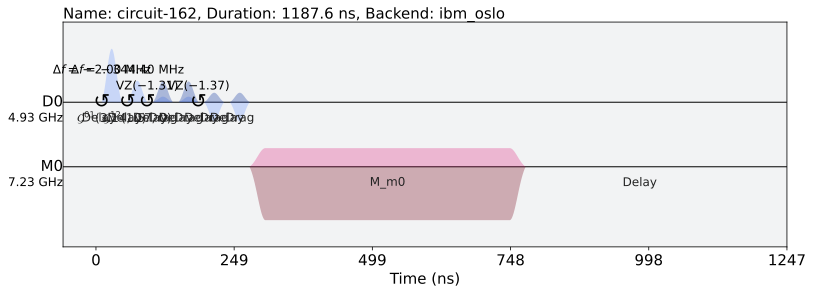

In [64]:
schedule(package[5], backend=backend).draw(backend=backend)

In [65]:
fineamp_job = backend.run(package, meas_level=1, meas_return='single', shots=2048)
print(fineamp_job.job_id())
job_monitor(fineamp_job)

63eebc5e2a88b636e7e2504d
Job Status: job has successfully run


In [66]:
fine_amp = DataAnalysis(experiment=fineamp_job, num_shots=2048)
fine_amp.retrieve_data(average=False)
fine_amp.lda()
fine_amp.count_pop()
fine_amp.error_mitiq()
#fine_amp.mitiq_data

In [82]:
fine_amp.mitiq_data[3:-3]

array([[2.70372753e-03, 4.74980292e-01, 5.22315981e-01],
       [1.78478210e-19, 4.17758784e-01, 5.82241216e-01],
       [0.00000000e+00, 5.66722129e-01, 4.33277871e-01],
       [6.60907789e-03, 3.45155100e-01, 6.48235822e-01],
       [5.77701304e-03, 5.94154941e-01, 4.00068046e-01],
       [6.09712287e-03, 2.86640218e-01, 7.07262659e-01],
       [4.88364811e-03, 6.24481246e-01, 3.70635106e-01]])

The error angle -0.01648090306580048, the new amplitude 0.07015217813867178


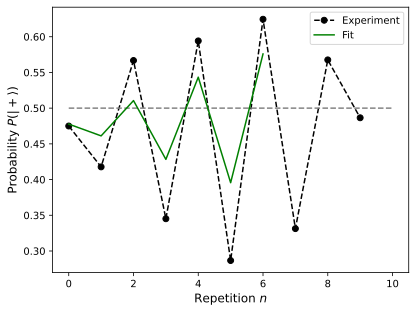

In [98]:
cal1 = fine_amp.mitiq_data[3:, 1]
func = lambda n, a, epsilon: a + 0.5 * (-1)**n * np.cos(0.5 * np.pi + 2 * n * epsilon) 

fit = curve_fit(func, np.arange(10), cal1, [0.5,0.05])
e = fit[0][1]
x_guess = ot['x_amp']/2
amp_x_01 = x_guess * (1/(1 + 2*e/np.pi))

print(f"The error angle {e}, the new amplitude {amp_x_01}")

plt.figure()
plt.plot(np.arange(10), cal1, "--o", color='black', label="Experiment")
plt.hlines(0.5,0, 10, linestyle="--", color="graY")
plt.plot(np.arange(7),func(np.arange(7), *fit[0]),"-", color='green', label="Fit")
plt.legend()
# plt.grid()
plt.xlabel(r"Repetition $n$", fontsize=12)
plt.ylabel(r"Probability $P(|+\rangle)$", fontsize=12)
plt.savefig('fig/sheldon15_12.png', dpi=1000)